In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
#load the file
file_path = 'C:/Users/elsad/Downloads/Brazil_Energy balance matrix_cleaned.xlsx'

Dict = pd.read_excel(file_path, sheet_name=None)

print(Dict.keys())

df_2021=Dict['2021']
df_2021 = df_2021.drop(columns=['Unnamed: 0'])
df_2021

dict_keys(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])


,SECTOR,OIL,NATURAL GAS,COAL,HYDROENERGY,GEOTHERMAL,NUCLEAR,FIREWOOD,SUGARCANE AND PRODUCTS,OTHER PRIMARY,...,DIESEL OIL,FUEL OIL,COKE,CHARCOAL,GASES,OTHER SECONDARY,NON-ENERGY,TOTAL SECUNDARIES,TOTAL,Year
0,PRODUCTION,152713.43,26371.48,2633.08,31125.01,NaN,3835.75,26017.95,49469.74,28037.32,...,41972.43,16109.25,6866.86,3915.43,2060.14,9109.18,5630.96,189790.51,320203.76,2021
1,IMPORT,7359.21,14796.23,13216.31,NaN,NaN,NaN,NaN,NaN,NaN,...,12211.92,581.74,1150.16,NaN,NaN,2901.18,1712.36,31674.90,67046.66,2021
2,EXPORT,65724.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,499.30,11963.08,NaN,NaN,NaN,841.83,385.76,17331.46,83055.53,2021
3,STOCK CHANGE,-1007.78,-3598.93,67.82,NaN,NaN,NaN,NaN,NaN,NaN,...,-22.66,-431.71,-92.50,NaN,NaN,-25.31,-8.20,-35.62,-4574.51,2021
4,UNUSED,NaN,1217.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1217.87,2021
5,TOTAL SUPPLY,93340.78,36350.92,15917.21,31125.01,NaN,3835.75,26017.95,49469.74,28037.32,...,53662.39,4296.20,7924.52,3915.43,2060.14,11143.23,6949.36,204098.32,298402.50,2021
6,REFINERIES,-92551.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36249.21,16109.25,NaN,NaN,NaN,7528.30,4710.47,95389.98,2838.23,2021
7,POWER PLANTS,NaN,-13219.00,-4189.67,-29752.22,NaN,-3835.75,-56.11,NaN,-7138.42,...,-1371.21,-1656.49,NaN,NaN,NaN,-75.30,NaN,46508.50,-14785.66,2021
8,SELF-PRODUCERS,NaN,-4266.04,-215.78,-1372.79,NaN,NaN,-373.38,-5782.78,-5688.41,...,-561.98,-225.32,NaN,NaN,-394.47,-551.30,NaN,9776.97,-9655.28,2021
9,GAS PLANTS,NaN,-2583.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,920.49,2354.08,-229.54,2021


In [3]:
df_2021.columns  

Index(['SECTOR', 'OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL',
       'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY',
       'TOTAL PRIMARIES', 'ELECTRICITY', 'LPG', 'GASOLINE/ALCOHOL',
       'KEROSENE/JET FUEL', 'DIESEL OIL', 'FUEL OIL', 'COKE', 'CHARCOAL',
       'GASES', 'OTHER SECONDARY', 'NON-ENERGY', 'TOTAL SECUNDARIES', 'TOTAL',
       'Year'],
      dtype='object')

In [4]:
Dict2=Dict.copy()

for k in Dict2.keys():
   # selected_columns = ['SECTOR', 'OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL',
    #   'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY', 'TOTAL PRIMARIES','Year']
    selected_columns = ['SECTOR','TOTAL','Year']
    Dict2[k]=Dict2[k][selected_columns]
    selected_rows=['OWN CONSUMPTION',
       'LOSSES', 'ADJUSTMENT', '   TRANSPORT ', '   INDUSTRIAL',
       '   RESIDENTIAL', '   COMMERCIAL, SERVICES, PUBLIC',
       '   AGRICULTURE, FISHING AND MINING', '   CONSTRUCTION AND OTHERS',
       'ENERGY CONSUMPTION', 'NON-ENERGY CONSUMPTION',
       'FINAL CONSUMPTION']
    Dict2[k]=Dict2[k][Dict2[k]['SECTOR'].isin(selected_rows)]
    
    # Concatenate all DataFrames in Dict vertically
    df_conc = pd.concat(Dict2.values(), ignore_index=True)
    
    # Move the column "Year" to the first position
    last_column_name = df_conc.columns[-1]
    # Reorder the columns by concatenating the last column with the rest of the DataFrame
    df_conc = pd.concat([df_conc[last_column_name], df_conc.drop(columns=last_column_name)], axis=1) # Datafames of TOTAL SUPPLY
    df_conc.set_index("Year", inplace=True)
    df_conc.index = df_conc.index.astype(int)
    #df_TC1=df_conc.drop(columns="SECTOR")
    # Set the value "NaN" by Zero
    df_TC1 = df_conc.apply(lambda column: column.fillna(0))
    
# Calculate the percentage of each product relative to 'TOTAL PRIMARIES'
#percentage_columns_2 = ['ELECTRICITY', 'LPG', 'GASOLINE/ALCOHOL', 'KEROSENE/JET FUEL',
 #      'DIESEL OIL', 'FUEL OIL', 'COKE', 'CHARCOAL', 'GASES',
  #     'OTHER SECONDARY', 'NON-ENERGY']
#percentage_columns_2= ['TOTAL PRIMARIES', 'TOTAL SECUNDARIES']

#df_TC1_percentages = (df_TC1[percentage_columns_2].div(df_TC1['TOTAL'], axis=0) * 100).applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)
df_TC1

,SECTOR,TOTAL
Year,,
1970,OWN CONSUMPTION,1554.76
1970,LOSSES,929.20
1970,ADJUSTMENT,1.85
1970,TRANSPORT,12661.99
1970,INDUSTRIAL,16020.92
...,...,...
2021,"AGRICULTURE, FISHING AND MINING",15421.69
2021,CONSTRUCTION AND OTHERS,0.00
2021,ENERGY CONSUMPTION,223957.54


In [5]:
# Group by Year and SECTOR, and sum the TOTAL values
grouped_df = df_TC1.groupby(['Year', 'SECTOR'])['TOTAL'].sum().reset_index()

# Pivot the data
pivot_df = grouped_df.pivot(index='Year', columns='SECTOR', values='TOTAL')


# Display the result
pivot_df.head()

SECTOR,"AGRICULTURE, FISHING AND MINING","COMMERCIAL, SERVICES, PUBLIC",CONSTRUCTION AND OTHERS,INDUSTRIAL,RESIDENTIAL,TRANSPORT,ADJUSTMENT,ENERGY CONSUMPTION,FINAL CONSUMPTION,LOSSES,NON-ENERGY CONSUMPTION,OWN CONSUMPTION
Year,,,,,,,,,,,,
1970,5351.01,1266.80,0.00,16020.92,22075.66,12661.99,1.85,57376.38,58834.12,929.20,1457.73,1554.76
1971,5317.39,1406.98,0.00,17454.73,22253.96,13841.87,4.11,60274.94,61691.69,1024.93,1416.75,1933.58
1972,5338.47,1570.69,0.00,19026.99,22440.87,15633.22,-29.62,64010.24,65995.12,1146.03,1984.88,2062.92
1973,5441.91,1737.84,0.00,21493.43,22354.13,18328.90,-17.64,69356.20,71692.86,1269.21,2336.65,2530.24
1974,5376.38,1873.46,7.15,23257.01,22316.70,20105.68,25.71,72936.38,76198.40,1458.78,3262.03,2986.07


In [6]:
# Dataframe Energy Consumption (EC)
df_EC=pivot_df.drop(columns=['   COMMERCIAL, SERVICES, PUBLIC','   CONSTRUCTION AND OTHERS','   INDUSTRIAL','   RESIDENTIAL' ,'   TRANSPORT ','LOSSES','OWN CONSUMPTION','ADJUSTMENT','FINAL CONSUMPTION','NON-ENERGY CONSUMPTION'])
df_EC.head()

SECTOR,"AGRICULTURE, FISHING AND MINING",ENERGY CONSUMPTION
Year,,
1970,5351.01,57376.38
1971,5317.39,60274.94
1972,5338.47,64010.24
1973,5441.91,69356.20
1974,5376.38,72936.38


In [7]:
# Drop the 'FINAL CONSUMPTION' column and calculate the percentages
df_percentages = (df_EC.drop(columns=['ENERGY CONSUMPTION']).div(df_EC['ENERGY CONSUMPTION'], axis=0) * 100)
df_percentages = df_percentages.round(2)

df_percentages.head()

SECTOR,"AGRICULTURE, FISHING AND MINING"
Year,
1970,9.33
1971,8.82
1972,8.34
1973,7.85
1974,7.37


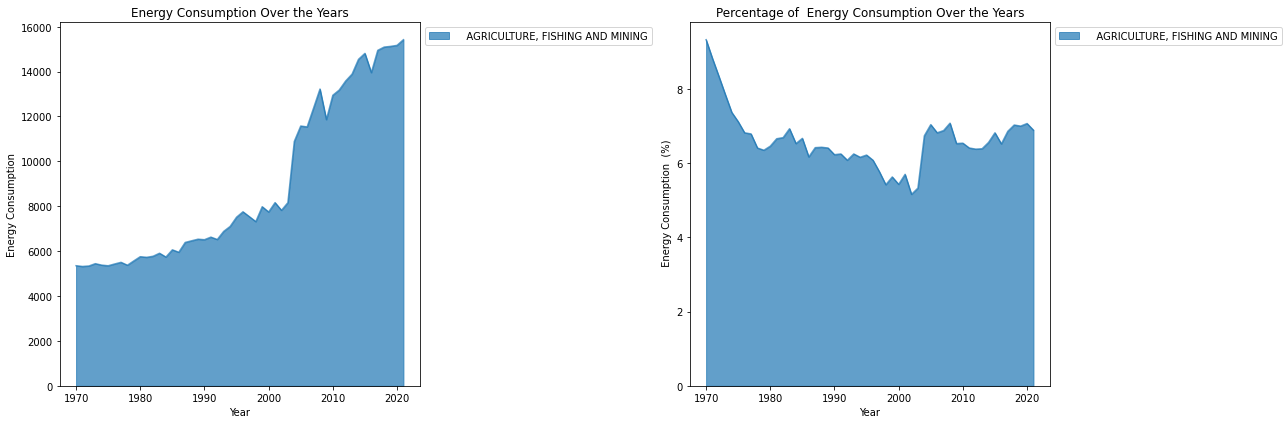

In [8]:
# Drop the 'TOTAL PRIMARIES' column (if not already dropped) as it is not needed for the stack plot
df_stackplot = df_EC.drop(columns=["ENERGY CONSUMPTION"])

# Plot both stack plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))


df_stackplot.plot.area(stacked=True, alpha=0.7, ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Energy Consumption')
ax1.set_title('Energy Consumption Over the Years')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

df_percentages.plot.area(stacked=True, alpha=0.7, ax=ax2)

ax2.set_xlabel('Year')
ax2.set_ylabel(' Energy Consumption  (%)')
ax2.set_title('Percentage of  Energy Consumption Over the Years')
ax2.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()

In [9]:
df_projection = df_stackplot

# Extract the years and values for the '   AGRICULTURE, FISHING AND MINING' sector
years = df_projection.index.values
values = df_projection['   AGRICULTURE, FISHING AND MINING'].values

# Reshape the years array to a 2D array for scikit-learn
years_2d = years.reshape(-1, 1)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(years_2d, values)

# Predict values for the existing years
predicted_values = model.predict(years_2d)

# Predict values for the next 20 years
future_years = np.arange(years[-1] + 1, years[-1] + 21).reshape(-1, 1)
future_predicted_values = model.predict(future_years)

# Print the predicted values for the next 20 years
for year, value in zip(future_years.flatten(), future_predicted_values):
    print(f"Year {year}: Predicted Value {value:.2f}")

Year 2022: Predicted Value 14813.88
Year 2023: Predicted Value 15037.59
Year 2024: Predicted Value 15261.30
Year 2025: Predicted Value 15485.01
Year 2026: Predicted Value 15708.72
Year 2027: Predicted Value 15932.43
Year 2028: Predicted Value 16156.14
Year 2029: Predicted Value 16379.85
Year 2030: Predicted Value 16603.56
Year 2031: Predicted Value 16827.27
Year 2032: Predicted Value 17050.98
Year 2033: Predicted Value 17274.68
Year 2034: Predicted Value 17498.39
Year 2035: Predicted Value 17722.10
Year 2036: Predicted Value 17945.81
Year 2037: Predicted Value 18169.52
Year 2038: Predicted Value 18393.23
Year 2039: Predicted Value 18616.94
Year 2040: Predicted Value 18840.65
Year 2041: Predicted Value 19064.36


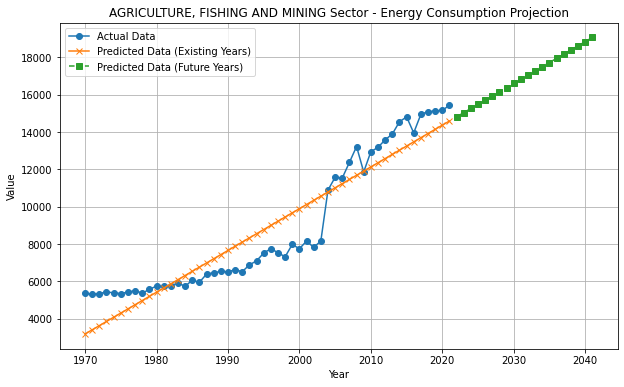

In [10]:
# Predict values for the existing years
predicted_values = model.predict(years_2d)

# Predict values for the next 20 years
future_years = np.arange(years[-1] + 1, years[-1] + 21).reshape(-1, 1)
future_predicted_values = model.predict(future_years)

# Create a linear plot
plt.figure(figsize=(10, 6))

# Plot actual data
plt.plot(years, values, label='Actual Data', marker='o')

# Plot predicted data for existing years
plt.plot(years, predicted_values, label='Predicted Data (Existing Years)', marker='x')

# Plot predicted data for future years
plt.plot(future_years, future_predicted_values, label='Predicted Data (Future Years)', linestyle='dashed', marker='s')

plt.title('AGRICULTURE, FISHING AND MINING Sector - Energy Consumption Projection')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
df_projectionp = df_percentages

# Extract the years and values for the '   AGRICULTURE, FISHING AND MINING' sector
years = df_projectionp.index.values
values = df_projectionp['   AGRICULTURE, FISHING AND MINING'].values

# Reshape the years array to a 2D array for scikit-learn
years_2d = years.reshape(-1, 1)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(years_2d, values)

# Predict values for the existing years
predicted_values = model.predict(years_2d)

# Predict values for the next 20 years
future_years = np.arange(years[-1] + 1, years[-1] + 21).reshape(-1, 1)
future_predicted_values = model.predict(future_years)

# Print the predicted values for the next 20 years
for year, value in zip(future_years.flatten(), future_predicted_values):
    print(f"Year {year}: Predicted Value {value:.2f}")

Year 2022: Predicted Value 6.17
Year 2023: Predicted Value 6.15
Year 2024: Predicted Value 6.14
Year 2025: Predicted Value 6.12
Year 2026: Predicted Value 6.10
Year 2027: Predicted Value 6.09
Year 2028: Predicted Value 6.07
Year 2029: Predicted Value 6.05
Year 2030: Predicted Value 6.04
Year 2031: Predicted Value 6.02
Year 2032: Predicted Value 6.00
Year 2033: Predicted Value 5.99
Year 2034: Predicted Value 5.97
Year 2035: Predicted Value 5.95
Year 2036: Predicted Value 5.93
Year 2037: Predicted Value 5.92
Year 2038: Predicted Value 5.90
Year 2039: Predicted Value 5.88
Year 2040: Predicted Value 5.87
Year 2041: Predicted Value 5.85


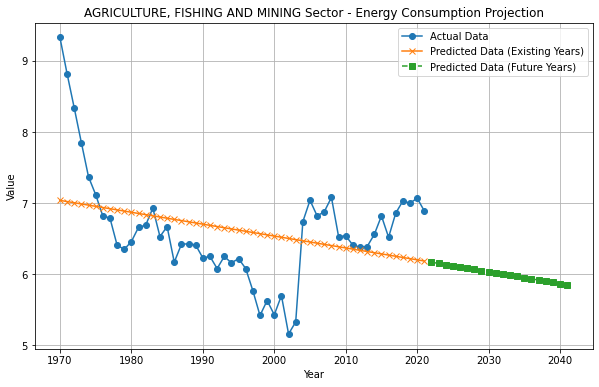

In [12]:
# Predict values for the existing years
predicted_values2 = model.predict(years_2d)

# Predict values for the next 20 years
future_years2 = np.arange(years[-1] + 1, years[-1] + 21).reshape(-1, 1)
future_predicted_values2 = model.predict(future_years)

# Create a linear plot
plt.figure(figsize=(10, 6))

# Plot actual data
plt.plot(years, values, label='Actual Data', marker='o')

# Plot predicted data for existing years
plt.plot(years, predicted_values, label='Predicted Data (Existing Years)', marker='x')

# Plot predicted data for future years
plt.plot(future_years2, future_predicted_values2, label='Predicted Data (Future Years)', linestyle='dashed', marker='s')

plt.title('AGRICULTURE, FISHING AND MINING Sector - Energy Consumption Projection')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()